# AI Fundamentals Part 2

Topics to cover:

- llms
- embeddings
- vector databases
- RAG
- DSPy - (chain of thought etc.)
- multimodal models



## What is an LLM?

LLM's (as we know and use them) really consist of two parts, the LLM and the assistant. **Note** The assistant is the same LLM but fine-tuned for some specific task.


### Creating the LLM

We discusse some basics of LLM architecture last time. A recap - they use the transformer architecture to keep attention to a sequence of tokens as they come in.

This is what Llama looks like


<div>

</div>

### Training the LLM

By itself just like other Neural Networks it's completely useless.

The first step is to train is on an enormous amount of data (the entire internet pretty much).

If you remember from last time when we had a quick look at language modelling, we're trying to predict the next token in a sequence (a regression task). So the training set of the internet means we can go sentence by sentence (or token by token) and create a training set, that being for each website the next token in the text. We do that over the whole internet and LLM is able to make pretty accurate predictions.

*It's a bit more nuanced that this but whatever.*

Once the LLM is trained it will basically start hallucinating things and because of the enormous amount of data it knows quite a lot about the world.


<div>

</div>

The result is the base model or foundation model

### The Assistant

To make the LLM useful we need to fine-tune an assistant. This is done with reinforcement learning with human feedback (RHLF). *I'm not going to split hairs but this isn't really refinforcement learning as initially conceived.*

So what we do is write a bunch of questions with answers for the LLM and fine-tune it based on the responses, using humans to check the output.

Once this is done, we have a fully functioning LLM (or at least one that we're all familiar with). We can ask it questions and get answers. Perhaps even unexpected ones.

Now let's do something fun with an LLM



## Tokenization

Before we start, let's recap that neural networks only work with numbers so we need a way to represent text as numbers inside an LLM. Tokenizers do this.  

Most LLMs have they're own tokenizer - that is they're own way of representing text. The tokenizer is important because it basically determines the input size of the network.

If a tokenizer products 100 tokens, that's all your network's going to be able to handle. *This is not the only thing that determines token size but it's one of them*

LLMs have a token limit. This is how many inputs there are to the network. ChatGPTs is 165k (or something) so that's how many inputs there are to the network. 

Let's tokenize something


In [1]:

import os
from typing import List, Optional

from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core import set_global_tokenizer
from transformers import AutoTokenizer

HF_TOKEN: Optional[str] = os.getenv("HUGGING_FACE_TOKEN")

tokenizer = AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-alpha").encode


/Users/hugo/Library/Caches/pypoetry/virtualenvs/ai-fundamentals-course-7_t86NUE-py3.12/lib/python3.12/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_id" in DeployedModel has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/hugo/Library/Caches/pypoetry/virtualenvs/ai-fundamentals-course-7_t86NUE-py3.12/lib/python3.12/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceLLM has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/hugo/Library/Caches/pypoetry/virtualenvs/ai-fundamentals-course-7_t86NUE-py3.12/lib/python3.12/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_kwargs" in HuggingFaceLLM has conflict with protected namespace "model_".

You may be able to resolv

In [2]:
tokenizer

<bound method PreTrainedTokenizerBase.encode of LlamaTokenizerFast(name_or_path='HuggingFaceH4/zephyr-7b-alpha', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='left', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '</s>', 'additional_special_tokens': ['<unk>', '<s>', '</s>']}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}>

In [7]:
tokenizer("Hello I am human") 

[1, 22557, 315, 837, 2930]

In [9]:
tokenizer("Hello I am human. I am Neerav")

[1, 22557, 315, 837, 2930, 28723, 315, 837, 3147, 263, 494]

## Embeddings

Now let's have a look at embeddings.

### What is an embedding?

Embeddings are basically just numerical representation of some sort of information. I say **information** because they can be used for text, audio, video and whatever else.

In fact, Google uses embeddings for text and images to link images to text. All you have to do to do this is generate the embeddings. We can then use these embeddings and feed them to an LLM so it can understand the representation and generate some output for us. (This is *RAG*). 

The relationship between tokens and embeddings is as follows:

An embedding is a vector representation of a token. What this means is that we now have a spatial representation of the tokens so tokens can be deemed close together. 

This image is quite a good representation of the **space** part of embeddings:


<div>
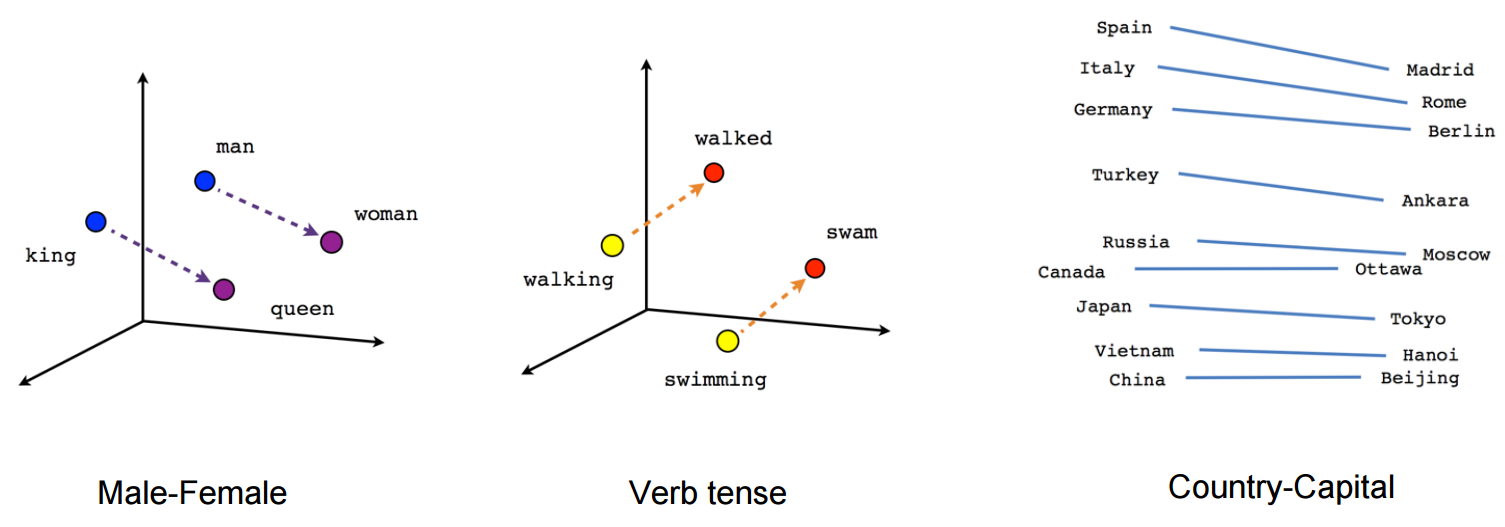
</div>


### Embeddings and LLMs


Remember our transformer architecture? 

Remember the encoder?

An embedding model is basically just the (trained) Transformer's encoder but rather than passing along the vectors to the hidden layers and beyond, it returns the vectors. That's why they're smaller than the transformer. It's also why each LLM needs to use it's own embedding model to generate embeddings it can actually understand.


Now let's make some embeddings


In [10]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings

embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")


# let's use this as our embed model from now on
Settings.embed_model = embed_model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [19]:
embed_model.get_text_embedding("Use AWS")
embed_model.get_text_embedding("and lambda")

[-0.07904338836669922,
 -0.026253581047058105,
 -0.027977406978607178,
 -0.0052429125644266605,
 0.002658350858837366,
 0.022449426352977753,
 0.019354404881596565,
 0.026833221316337585,
 0.03969861567020416,
 0.010571194812655449,
 0.006268054712563753,
 -0.039326127618551254,
 0.015632204711437225,
 -0.006962334271520376,
 0.04879424721002579,
 0.013836021535098553,
 0.00625922717154026,
 0.052314285188913345,
 -0.1239255741238594,
 0.0050061726942658424,
 0.10596692562103271,
 -0.033964239060878754,
 -0.01520691066980362,
 -0.05203014612197876,
 -0.01973908767104149,
 0.026782944798469543,
 -0.0207467470318079,
 -0.03559872880578041,
 0.015198864042758942,
 -0.14349336922168732,
 0.0008542832802049816,
 -0.03582959994673729,
 0.045984767377376556,
 -0.00863518938422203,
 0.012886308133602142,
 -0.048183489590883255,
 -0.007620769087225199,
 -0.031073205173015594,
 -0.0991918072104454,
 -0.008295145817101002,
 0.046656496822834015,
 -0.03321840614080429,
 -0.02787192165851593,
 0.01

In [13]:
# let's load an llm and get a response about something

from llama_index.llms.huggingface import HuggingFaceLLM

# this will take a while sorry
llm = HuggingFaceLLM(model_name="HuggingFaceH4/zephyr-7b-beta")


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the disk.
The model `HuggingFaceH4/zephyr-7b-beta` and tokenizer `StabilityAI/stablelm-tuned-alpha-3b` are different, please ensure that they are compatible.


## Vector Stores

So we generate a bunch of embeddings and then what? Well we need a way to store them and search them. This is where vector stores come in. All a vector store does is let's you store the embeddings and makes them searchable using linear algebra.

ChatGPT uses Cosine Similarity which is illustrated here:

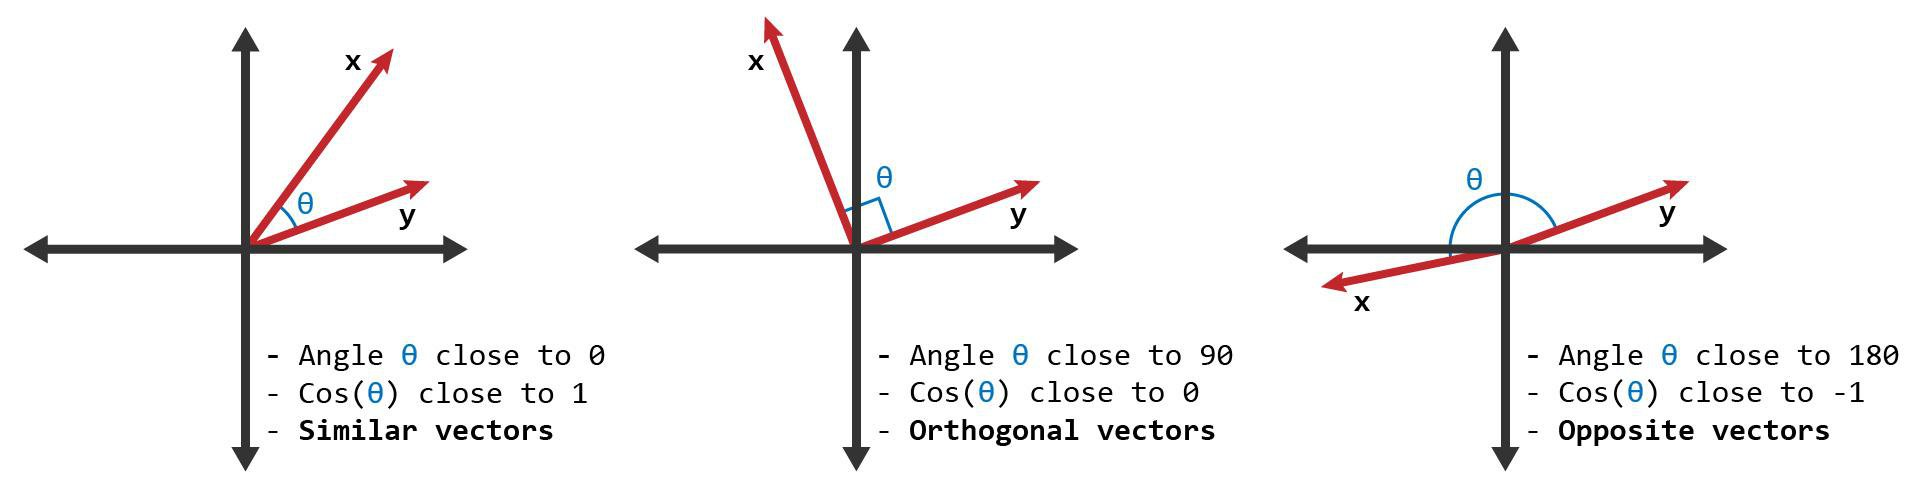

This is an optional walkthrough since some people don't like maths.

There are other ways to assess similarity but you can explore those in your own time.

In [20]:
# now that we know this let's make a vector store (in-memory)
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex

reader = SimpleDirectoryReader(input_files=["newsuk-rfc.txt"])
docs = reader.load_data()

index = VectorStoreIndex.from_documents(docs)

## RAG

So what is RAG. Well it's retrieval augmented generation and I'm sure everyone thinks they know what's happening. Let's dig a bit deeper though.

<div>

</div>

As you can see with RAG we're using the encoder in the LLM to generate embeddings, then searching our vector store to get relevant embeddings, then feeding the documents into the LLM to set it's context and tell it to use those to generate an answer.

There are a lot of steps for potential optimisation:

1. The encoder (generating the embeddings)
2. The vector store (retrieval)
3. The context
4. The generation



## Prompt Engineering

So we've looked at generating embeddings, storing them, retrieving them and using them to generate responses. What about prompt engineering?

The current idea with prompt engineering is that you set a prompt for the LLM and tell it to answer in that way.

For example:

<div>
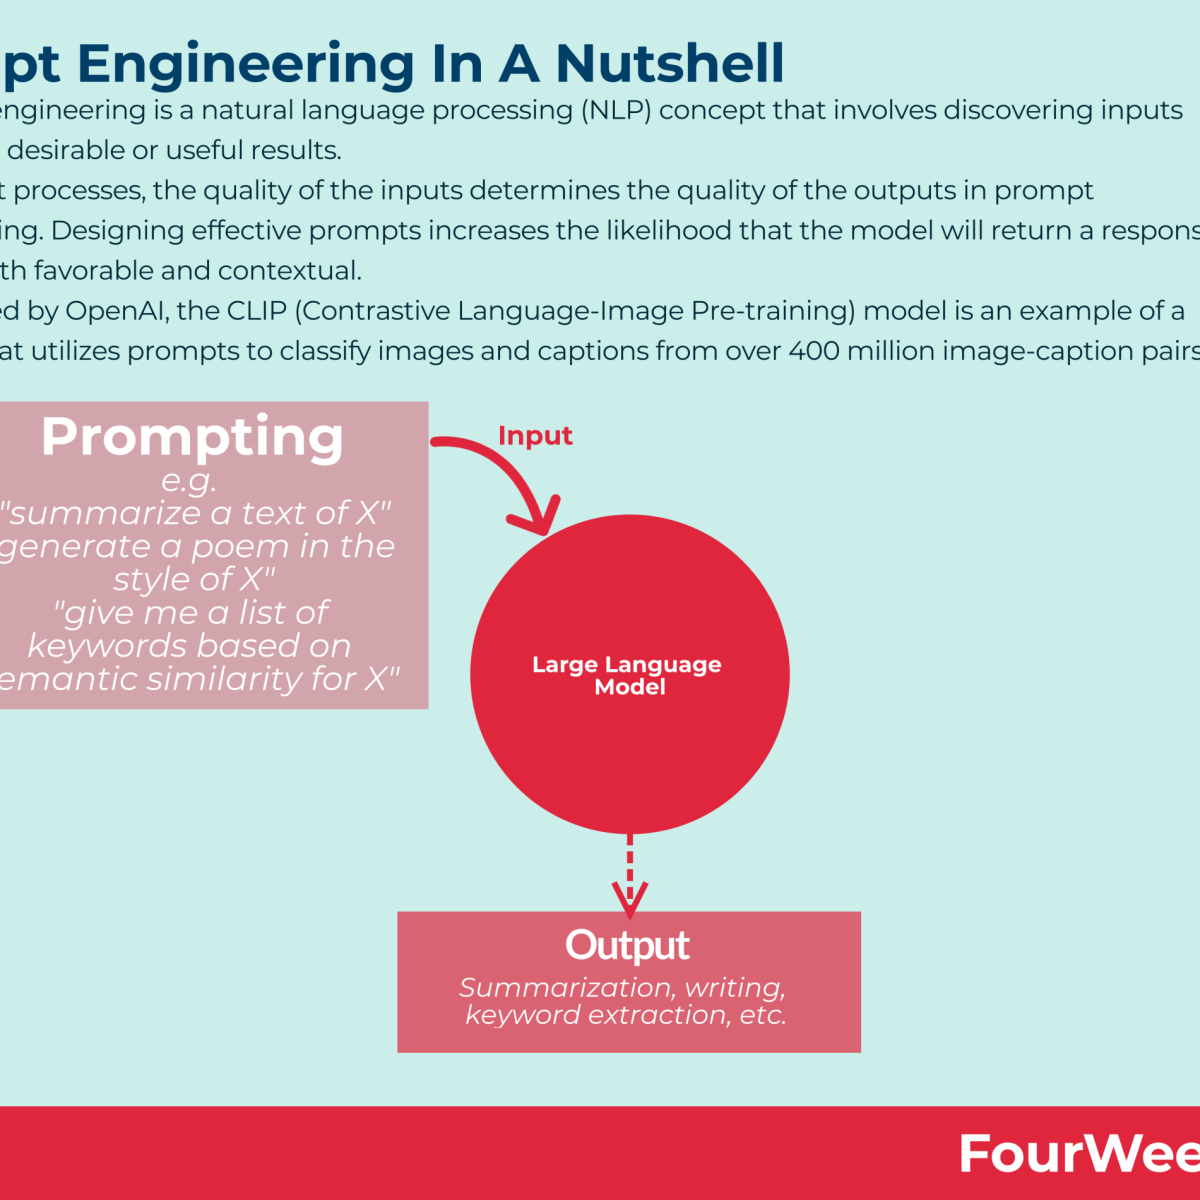
</div>

Okay I was mean to the author of this but this is basically just describing some magic process whereby we come up with the perfect prompt and get the perfect result.

What we really need is a way to program the prompt.


### DSPy

This is where DSPy comes in. Basically it allows us to develop LLM application programmatically without having a mental amount of magic involved.

The DSPy paper is very good https://arxiv.org/abs/2310.03714 if you want to learn more. 


Let's have a go putting everything together with DSPy to make RAG pipeline with DSpy and LLama Index

While I'm not going to show it off we can also do things like chain of thought, illustrated below:

<div>
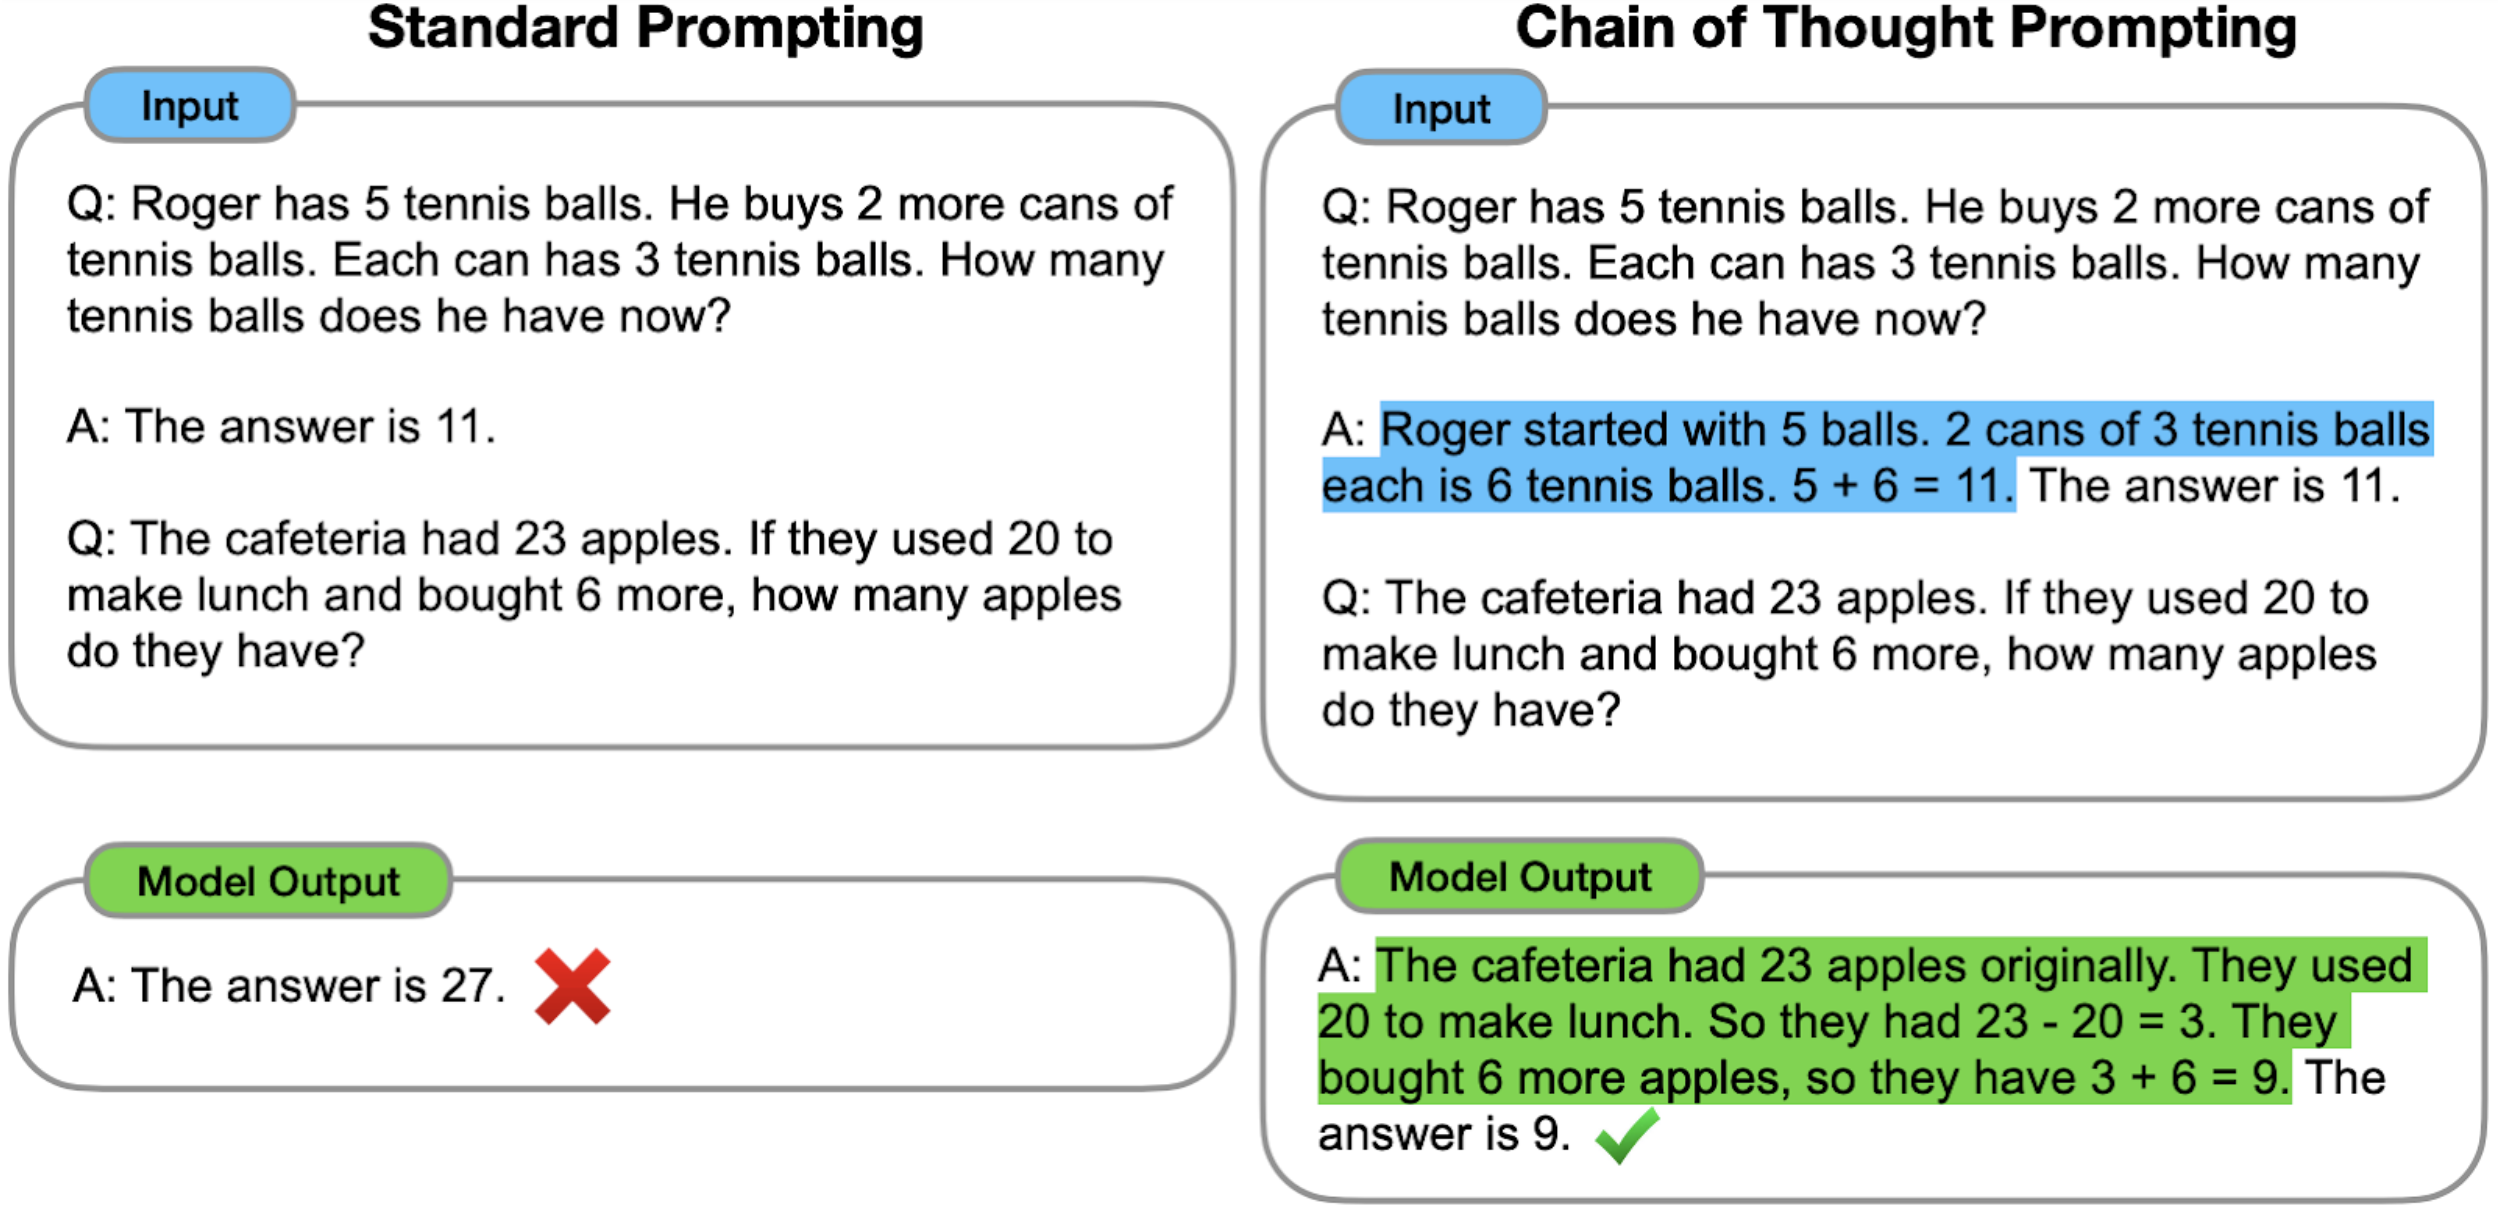
</div>


Effectively dspy allows us to make the LLM introspect and *think* about what it's doing to get the correct answer.

In [21]:
import dspy
import torch

# load the llm we're going to use
# we're using claude remotely on aws but if you want you can uncomment the below and use zephyr
# lm = dspy.HFModel("HuggingFaceH4/zephyr-7b-beta")
# # if you're not using a MAC you know what to do
# device = torch.device("mps")

bedrock = dspy.Bedrock(region_name="eu-west-2")
# Settings.embed_model = embed_mode
lm = dspy.AWSAnthropic(bedrock, "anthropic.claude-3-sonnet-20240229-v1:0")
dspy.settings.configure(lm=lm)

In [37]:
# define a prompt
class GenerateAnswer(dspy.Signature):
    """Answer questions with short factoid answers."""

    context_str = dspy.InputField(desc="contains relevant facts.")
    query_str = dspy.InputField()
    # basically don't answer with more than 5 words
    answer = dspy.OutputField(desc="give responses between 1 and 5 words. Answer in cockney slang")


# define our retriever
retriever = index.as_retriever(similarity_top_k=2)

In [38]:
# see how we can retrieve things
retriever.retrieve("cloud platform")

[NodeWithScore(node=TextNode(id_='2a7c4443-6d66-487d-8d92-1d1551a51253', embedding=None, metadata={'file_path': 'newsuk-rfc.txt', 'file_name': 'newsuk-rfc.txt', 'file_type': 'text/plain', 'file_size': 5062, 'creation_date': '2024-10-04', 'last_modified_date': '2024-10-02'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='3091d557-2503-4f51-a3d7-2b6f2acdcb9c', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': 'newsuk-rfc.txt', 'file_name': 'newsuk-rfc.txt', 'file_type': 'text/plain', 'file_size': 5062, 'creation_date': '2024-10-04', 'last_modified_date': '2024-10-02'}, hash='3b6d024479f2333e0f37e19cf1b2e7892ce317bf3c1aae9752d629cd8372c7ce'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='5

In [39]:
# create a query pipeline
from llama_index.core.query_pipeline import QueryPipeline as QP, InputComponent, FnComponent
from dspy.predict.llamaindex import DSPyComponent, LlamaIndexModule

dspy_component = DSPyComponent(
    dspy.Predict(GenerateAnswer)
)

retriever_post = FnComponent(
    lambda contexts: "\n\n".join([n.get_content() for n in contexts])
)


p = QP(verbose=True)
p.add_modules(
    {
        "input": InputComponent(),
        "retriever": retriever,
        "retriever_post": retriever_post,
        "synthesizer": dspy_component,
    }
)
p.add_link("input", "retriever")
p.add_link("retriever", "retriever_post")
p.add_link("input", "synthesizer", dest_key="query_str")
p.add_link("retriever_post", "synthesizer", dest_key="context_str")


dspy_qp = LlamaIndexModule(p)

In [29]:
output = dspy_qp(query_str="What tags should I use?")
output.answer

> Running module input with input: 
query_str: What tags should I use?

> Running module retriever with input: 
input: What tags should I use?

> Running module retriever_post with input: 
contexts: [NodeWithScore(node=TextNode(id_='2a7c4443-6d66-487d-8d92-1d1551a51253', embedding=None, metadata={'file_path': 'newsuk-rfc.txt', 'file_name': 'newsuk-rfc.txt', 'file_type': 'text/plain', 'file_size':...

> Running module synthesizer with input: 
query_str: What tags should I use?
context_str: # RFC 5: Infrastructure Tagging

- **Original Author(s)**: Not an LLM
- **Tracking Issue(s)**: -

## TLDR

All resources deployed in a cloud platform **MUST** be tagged with a `ServiceCatalogueId`, `S...



'The RFC clearly specifies the required tags that must be used for all resources deployed in the cloud platform:\n\n- ServiceCatalogueId\n- ServiceName  \n- Environment\n- Repository\n\nIt provides examples of how to set these tags when using Terraform for AWS resources, as well as the formatting required for GCP and Kubernetes resources. The RFC aims to standardize tagging across the organization to enable better resource and cost tracking, identification of responsible teams, and locating the relevant infrastructure code. Please refer to the "Proposal" section for the detailed requirements and examples on implementing these mandatory tags.'

In [40]:
# let's now "train" our dspy prompt
from dspy import Example

train_examples = [
    Example(query_str="What tags should I use", answer="You should have ServiceCatalogueID."),
    Example(query_str="What is the capital of France?", answer="I don't know.")
]

train_examples = [t.with_inputs("query_str") for t in train_examples]

In [41]:
# now we're going to define success
import nest_asyncio
nest_asyncio.apply()
from dspy.teleprompt import BootstrapFewShot
from llama_index.core.evaluation import SemanticSimilarityEvaluator

# this is a very simple evaluator but it's remarkably effective. There are seriously fancy ways out there
# even using another LLM to check the results and give feedback
evaluator = SemanticSimilarityEvaluator(similarity_threshold=0.5)

# Validation logic: check that the predicted answer is correct.
# Also check that the retrieved context does actually contain that answer.
def validate_context_and_answer(example, pred, trace=None):
    result = evaluator.evaluate(response=pred.answer, reference=example.answer)
    return result.passing

# Set up a basic teleprompter, which will compile our RAG program.
teleprompter = BootstrapFewShot(max_labeled_demos=0, metric=validate_context_and_answer)

# Compile!
compiled_dspy_qp = teleprompter.compile(dspy_qp, trainset=train_examples)

  0%|                                                                                                                    | 0/2 [00:00<?, ?it/s]

> Running module input with input: 
query_str: What tags should I use

> Running module retriever with input: 
input: What tags should I use

> Running module retriever_post with input: 
contexts: [NodeWithScore(node=TextNode(id_='2a7c4443-6d66-487d-8d92-1d1551a51253', embedding=None, metadata={'file_path': 'newsuk-rfc.txt', 'file_name': 'newsuk-rfc.txt', 'file_type': 'text/plain', 'file_size':...

> Running module synthesizer with input: 
query_str: What tags should I use
context_str: # RFC 5: Infrastructure Tagging

- **Original Author(s)**: Not an LLM
- **Tracking Issue(s)**: -

## TLDR

All resources deployed in a cloud platform **MUST** be tagged with a `ServiceCatalogueId`, `S...



 50%|██████████████████████████████████████████████████████                                                      | 1/2 [00:02<00:02,  2.89s/it]

> Running module input with input: 
query_str: What is the capital of France?

> Running module retriever with input: 
input: What is the capital of France?

> Running module retriever_post with input: 
contexts: [NodeWithScore(node=TextNode(id_='2a7c4443-6d66-487d-8d92-1d1551a51253', embedding=None, metadata={'file_path': 'newsuk-rfc.txt', 'file_name': 'newsuk-rfc.txt', 'file_type': 'text/plain', 'file_size':...

> Running module synthesizer with input: 
query_str: What is the capital of France?
context_str: # RFC 5: Infrastructure Tagging

- **Original Author(s)**: Not an LLM
- **Tracking Issue(s)**: -

## TLDR

All resources deployed in a cloud platform **MUST** be tagged with a `ServiceCatalogueId`, `S...



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.77s/it]

Bootstrapped 1 full traces after 2 examples in round 0.


In [42]:
# test this out 
compiled_dspy_qp(query_str="What tags should I use for AWS services?")

# we're not going to but we can take it a step further and even work with existing prompts in dspy.
# it's a very impressive framework

> Running module input with input: 
query_str: What tags should I use for AWS services?

> Running module retriever with input: 
input: What tags should I use for AWS services?

> Running module retriever_post with input: 
contexts: [NodeWithScore(node=TextNode(id_='2a7c4443-6d66-487d-8d92-1d1551a51253', embedding=None, metadata={'file_path': 'newsuk-rfc.txt', 'file_name': 'newsuk-rfc.txt', 'file_type': 'text/plain', 'file_size':...

> Running module synthesizer with input: 
query_str: What tags should I use for AWS services?
context_str: # RFC 5: Infrastructure Tagging

- **Original Author(s)**: Not an LLM
- **Tracking Issue(s)**: -

## TLDR

All resources deployed in a cloud platform **MUST** be tagged with a `ServiceCatalogueId`, `S...



Prediction(
    answer='According to the RFC, for AWS services you must use the following tags:\n\n- ServiceCatalogueId\n- ServiceName  \n- Environment\n- Repository\n\nExpressed in cockney rhyming slang.'
)

## Conclusion

So there you have it. You now know how to build RAG pipelines and understand LLMs and also DSPy

### A word on TextGrad

There's a new kind on the block called TextGrad which differs from DSPy but is also rather similar to it. Texgrad works across a "compound AI" system. e.g. multiple different AI systems (or LLMs) in action and tries to optimise the interactions between each of them. It uses *textual gradient descent* and backpropagates this through the AI system(s). It's not as mature as DSPy (and DSPy already have plans to include TextGrad in their framework) but it's interesting in that it effectively performs gradient descent on the prompts to try and get a better answer. DSPy just uses a metric to evaluate the whole pipeline. 

A word of caution. Things are moving rapidly in this space so it could be that this stuff becomes redundant in a few months. However the fundamentals remain the same.